# 데이터셋_4(심각도) =>
## 데이터셋_3(심각도)에서 '기타/불명' 및 '기타' 컬럼을 모두 제외한 것임

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [2]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_4(심각도).csv',encoding='cp949')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고유형        27284 non-null  object
 1   연령가해자       27284 non-null  object
 2   법규위반가해자     27284 non-null  object
 3   행동유형가해자     27284 non-null  object
 4   피해자신체상해주부위  27284 non-null  object
 5   차량용도가해자     27284 non-null  object
 6   도로종류        27284 non-null  object
 7   도로형태        27284 non-null  object
 8   도로선형        27284 non-null  object
 9   발생시각        27284 non-null  object
 10  심각도         27284 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
1,횡단중,51-60세,그룹1,그룹3,그룹4,그룹1,시도,교차로,평지,저녁~자정,1
2,길가장자리구역통행중,31-40세,그룹1,그룹3,그룹3,그룹4,시도,단일로,평지,낮,1
3,횡단중,41-50세,그룹1,그룹2,그룹4,그룹1,시도,단일로,평지,출퇴근시간,1
4,횡단중,51-60세,그룹2,그룹3,그룹4,그룹1,시도,교차로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
27279,횡단중,31-40세,그룹1,그룹2,그룹5,그룹4,시도,교차로,평지,낮,1
27280,횡단중,41-50세,그룹1,그룹3,그룹5,그룹2,군도,교차로,평지,출퇴근시간,1
27281,횡단중,41-50세,그룹2,그룹3,그룹5,그룹1,시도,교차로,평지,출퇴근시간,1
27282,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [9]:
feature_columns = df.columns.difference(["심각도"]) # Target column 빼기

y=pd.DataFrame(df['심각도'])
x=df.drop(['심각도'],axis=1)
X=pd.get_dummies(x,drop_first=True)

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 35) (8186, 35) (19098, 1) (8186, 1)


# train & OLS 회귀모델 적합

In [10]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.750
Method:                 Least Squares   F-statistic:                              1635.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:28:14   Log-Likelihood:                         -10866.
No. Observations:               19098   AIC:                                  2.180e+04
Df Residuals:                   19063   BIC:                                  2.208e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.0628      0.019      3.232      0.001       0.025       0.101
사고유형_차도통행중         0.0570      0.013      4.385      0.000       0.032       0.082
사고유형_횡단중           0.0922      0.011      8.270      0.000       0.070       0.114
연령가해자_21-30세       0.0024      0.024      0.100      0.920      -0.045       0.050
연령가해자_31-40세       0.0094      0.024      0.397      0.691      -0.037       0.056
연령가해자_41-50세       0.0160      0.023      0.683      0.495      -0.030       0.062
연령가해자_51-60세       0.0040      0.023      0.170      0.865      -0.042       0.050
연령가해자_61-64세       0.0192      0.025      0.773      0.439      -0.029       0.068
연령가해자_65세이상        0.0047      0.024      0.196      0.845      -0.042       0.051
법규위반가해자_그룹2        0.0199      0.007      2.689      0.007       0.005       0.034
법규위반가해자_그룹3        0.1654      0.033      5.003      0.000       0.101       0.230
행동유형가해자_그룹2        0.0831      0.014      5.795      0.000       0.055       0.111
행동유형가해자_그룹3        0.0540      0.015      3.578      0.000       0.024       0.084
행동유형가해자_그룹4       -0.0617      0.054     -1.149      0.251      -0.167       0.044
피해자신체상해주부위_그룹2     0.2003      0.063      3.173      0.002       0.077       0.324
피해자신체상해주부위_그룹3     0.3213      0.063      5.132      0.000       0.199       0.444
피해자신체상해주부위_그룹4     0.4068      0.063      6.503      0.000       0.284       0.529
피해자신체상해주부위_그룹5     0.4633      0.063      7.410      0.000       0.341       0.586
피해자신체상해주부위_그룹6     0.5363      0.063      8.479      0.000       0.412       0.660
차량용도가해자_그룹2       -0.0183      0.018     -1.028      0.304      -0.053       0.017
차량용도가해자_그룹3       -0.0832      0.015     -5.592      0.000      -0.112      -0.054
차량용도가해자_그룹4       -0.0376      0.007     -5.154      0.000      -0.052      -0.023
차량용도가해자_그룹5       -0.1846      0.027     -6.780      0.000      -0.238      -0.131
도로종류_군도            0.2280      0.068      3.353      0.001       0.095       0.361
도로종류_시도            0.2152      0.067      3.201      0.001       0.083       0.347
도로종류_일반국도          0.2784      0.068      4.082      0.000       0.145       0.412
도로종류_지방도           0.2416      0.068      3.555      0.000       0.108       0.375
도로종류_특별광역시도        0.1899      0.067      2.828      0.005       0.058       0.322
도로형태_단일로           0.0046      0.007      0.646      0.519      -0.009       0.019
도로형태_주차장          -0.0623      0.068     -0.915      0.360      -0.196       0.071
도로선형_오르막          -0.0214      0.018     -1.182      0.237      -0.057       0.014
도로선형_평지           -0.0409      0.013     -3.106      0.002      -0.067      -0.015
발생시각_새벽~아침         0.0926      0.010      9.282      0.000       0.073       0.

# 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [11]:
corolla = pd.concat([train_x,train_y],axis=1)  # 더미변수 + 종속변수 
#corolla = sm.add_constant(corolla, has_constant='add')

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.439057,사고유형_보도통행중
1,2.530016,사고유형_차도통행중
2,9.424649,사고유형_횡단중
3,5.852010,연령가해자_21-30세
4,9.301975,연령가해자_31-40세
5,12.590570,연령가해자_41-50세
6,15.069949,연령가해자_51-60세
7,5.656685,연령가해자_61-64세
8,8.721554,연령가해자_65세이상
9,1.710325,법규위반가해자_그룹2


## VIF Factor가 100 이상인 아래 컬럼 삭제 후 재진행

In [13]:
X = X.drop(['피해자신체상해주부위_그룹4','피해자신체상해주부위_그룹5','도로종류_시도','도로종류_특별광역시도'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

### 삭제 한 후의 ols 결과

In [14]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              1792.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:29:44   Log-Likelihood:                         -11078.
No. Observations:               19098   AIC:                                  2.222e+04
Df Residuals:                   19067   BIC:                                  2.246e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.1359      0.019      7.046      0.000       0.098       0.174
사고유형_차도통행중         0.1180      0.013      9.264      0.000       0.093       0.143
사고유형_횡단중           0.1589      0.011     14.610      0.000       0.138       0.180
연령가해자_21-30세       0.3214      0.019     17.250      0.000       0.285       0.358
연령가해자_31-40세       0.3331      0.018     18.930      0.000       0.299       0.368
연령가해자_41-50세       0.3472      0.017     20.355      0.000       0.314       0.381
연령가해자_51-60세       0.3344      0.017     19.847      0.000       0.301       0.367
연령가해자_61-64세       0.3442      0.019     18.189      0.000       0.307       0.381
연령가해자_65세이상        0.3289      0.018     18.675      0.000       0.294       0.363
법규위반가해자_그룹2        0.0132      0.007      1.774      0.076      -0.001       0.028
법규위반가해자_그룹3        0.1828      0.033      5.580      0.000       0.119       0.247
행동유형가해자_그룹2        0.1979      0.013     14.844      0.000       0.172       0.224
행동유형가해자_그룹3        0.1631      0.014     11.656      0.000       0.136       0.191
행동유형가해자_그룹4        0.0430      0.056      0.775      0.439      -0.066       0.152
피해자신체상해주부위_그룹2    -0.2205      0.011    -19.833      0.000      -0.242      -0.199
피해자신체상해주부위_그룹3    -0.0990      0.008    -12.883      0.000      -0.114      -0.084
피해자신체상해주부위_그룹6     0.1179      0.012      9.952      0.000       0.095       0.141
차량용도가해자_그룹2        0.0074      0.018      0.412      0.680      -0.028       0.043
차량용도가해자_그룹3        0.0037      0.014      0.258      0.797      -0.025       0.032
차량용도가해자_그룹4       -0.0152      0.007     -2.087      0.037      -0.029      -0.001
차량용도가해자_그룹5       -0.0808      0.027     -3.041      0.002      -0.133      -0.029
도로종류_군도            0.0474      0.013      3.581      0.000       0.021       0.073
도로종류_일반국도          0.0660      0.014      4.882      0.000       0.040       0.093
도로종류_지방도           0.0428      0.012      3.600      0.000       0.019       0.066
도로형태_단일로           0.0249      0.007      3.515      0.000       0.011       0.039
도로형태_주차장          -0.0271      0.081     -0.337      0.736      -0.185       0.131
도로선형_오르막           0.0712      0.018      4.059      0.000       0.037       0.106
도로선형_평지            0.0582      0.012      4.767      0.000       0.034       0.082
발생시각_새벽~아침         0.1163      0.010     11.488      0.000       0.096       0.136
발생시각_저녁~자정         0.0505      0.011      4.710      0.000       0.030       0.072
발생시각_출퇴근시간         0.0550      0.007      7.576      0.000       0.041       0.069
==============================================================================
Omnibus:                     2991.883   Durbin-Watson:                   2.008
Prob

## 여기서 P값이 유의하지 않은 컬럼 삭제 후 OLS

In [15]:
X = X.drop(['법규위반가해자_그룹2','행동유형가해자_그룹4','차량용도가해자_그룹2','차량용도가해자_그룹3','도로형태_주차장'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              2149.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:31:19   Log-Likelihood:                         -11052.
No. Observations:               19098   AIC:                                  2.216e+04
Df Residuals:                   19072   BIC:                                  2.236e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.1591      0.019      8.443      0.000       0.122       0.196
사고유형_차도통행중         0.1225      0.013      9.674      0.000       0.098       0.147
사고유형_횡단중           0.1707      0.011     16.225      0.000       0.150       0.191
연령가해자_21-30세       0.3161      0.018     17.341      0.000       0.280       0.352
연령가해자_31-40세       0.3265      0.017     19.061      0.000       0.293       0.360
연령가해자_41-50세       0.3438      0.016     20.965      0.000       0.312       0.376
연령가해자_51-60세       0.3355      0.016     20.724      0.000       0.304       0.367
연령가해자_61-64세       0.3370      0.018     18.304      0.000       0.301       0.373
연령가해자_65세이상        0.3343      0.017     19.528      0.000       0.301       0.368
법규위반가해자_그룹3        0.1880      0.033      5.722      0.000       0.124       0.252
행동유형가해자_그룹2        0.1922      0.013     15.056      0.000       0.167       0.217
행동유형가해자_그룹3        0.1605      0.014     11.870      0.000       0.134       0.187
피해자신체상해주부위_그룹2    -0.2251      0.011    -20.293      0.000      -0.247      -0.203
피해자신체상해주부위_그룹3    -0.0947      0.008    -12.342      0.000      -0.110      -0.080
피해자신체상해주부위_그룹6     0.1180      0.012     10.018      0.000       0.095       0.141
차량용도가해자_그룹4       -0.0167      0.007     -2.526      0.012      -0.030      -0.004
차량용도가해자_그룹5       -0.0850      0.026     -3.259      0.001      -0.136      -0.034
도로종류_군도            0.0503      0.013      3.781      0.000       0.024       0.076
도로종류_일반국도          0.0671      0.014      4.918      0.000       0.040       0.094
도로종류_지방도           0.0518      0.012      4.399      0.000       0.029       0.075
도로형태_단일로           0.0237      0.007      3.385      0.001       0.010       0.037
도로선형_오르막           0.0720      0.017      4.156      0.000       0.038       0.106
도로선형_평지            0.0572      0.012      4.772      0.000       0.034       0.081
발생시각_새벽~아침         0.1246      0.010     12.430      0.000       0.105       0.144
발생시각_저녁~자정         0.0608      0.011      5.686      0.000       0.040       0.082
발생시각_출퇴근시간         0.0561      0.007      7.750      0.000       0.042       0.070
==============================================================================
Omnibus:                     2901.398   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2907.448
Skew:                          -0.889   Prob(JB):                         0.00
Kurtosis:                       2.299   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


## y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [17]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)
    
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0.0,1.0
y예측,8093,93


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

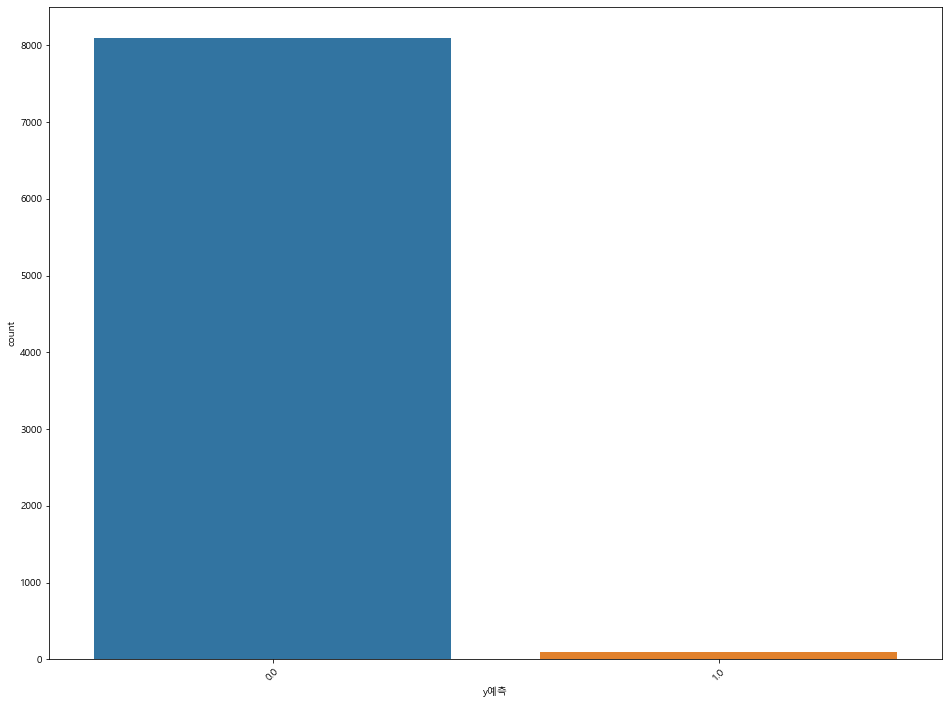

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

##  다중공선성 재검사
#### ▶ 행동유형가해자 그룹2 의 vif > 10 이지만 제거하면 행동유형가해자 컬럼의 범주가 '그룹3'만 남기때문에 비교를 위해 삭제 안 함
#### ▶ 도로선형_평지 의 vif > 10 이지만 제거하면 도로선형 컬럼의 범주가 '오르막'만 남기때문에 비교를 위해 삭제 안 함

In [20]:
corolla = pd.concat([train_x,train_y],axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.362398,사고유형_보도통행중
1,2.373742,사고유형_차도통행중
2,8.320824,사고유형_횡단중
3,3.340023,연령가해자_21-30세
4,4.865642,연령가해자_31-40세
5,6.245479,연령가해자_41-50세
6,7.330302,연령가해자_51-60세
7,3.035303,연령가해자_61-64세
8,4.474587,연령가해자_65세이상
9,1.026677,법규위반가해자_그룹3


---

---

---

# ■ ols 모델에서 중요 변수를 선택하는 과정을 수행해보자

### ▶ 위 진행방식과 달리 상수항을 정의하기위해 'const'라는 컬럼을 추가하였다. (각 행마다 1을 부여)

### ▶ 아래에 결과를 보면 R값이 약 2.5% 또는 2.6%가 산출되는데, const를 추가함으로써 생기는 새로운 문제이다.

### ▶ 상수항을 제거한 모델을 사용하는것에는 많은 오류가 있는 것으로 보인다.

# 0.변수선택법

In [21]:
feature_columns = train_x.columns.difference(["심각도"])

In [22]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AB2B8E730>, 'AIC': 22155.587490414666}


In [23]:
train_x= sm.add_constant(train_x, has_constant='add')

In [24]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [25]:
print(getBest(x=train_x,y=train_y,k=2))

Processed 325 models on 2 predictors in 1.0569183826446533 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                22344.2
Name: 315, dtype: object


In [26]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 26 models on 1 predictors in 0.08372211456298828 seconds.
Processed 325 models on 2 predictors in 1.2829124927520752 seconds.
Processed 2600 models on 3 predictors in 16.27273464202881 seconds.
Processed 14950 models on 4 predictors in 406.0816476345062 seconds.
Total elapsed time :  489.49181056022644 seconds
            AIC                                              model
1  22650.088795  <statsmodels.regression.linear_model.Regressio...
2  22344.156141  <statsmodels.regression.linear_model.Regressio...
3  22213.489019  <statsmodels.regression.linear_model.Regressio...
4  22110.431412  <statsmodels.regression.linear_model.Regressio...


In [27]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    심각도   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     255.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          3.36e-214
Time:                        14:43:05   Log-Likelihood:                -11050.
No. Observations:               19098   AIC:                         2.211e+04
Df Residuals:                   19093   BIC:                         2.215e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
발생시각_새벽~아침         0.1008      0.009     11.085      0.000       0.083       0.119
사고유형_횡단중           0.0719      0.007     10.263      0.000       0.058       0.086
피해자신체상해주부위_그룹2    -0.2582      0.011    -23.445      0.000      -0.280      -0.237
피해자신체상해주부위_그룹3    -0.1297      0.008    -17.215      0.000      -0.145      -0.115
const              0.7196      0.006    110.742      0.000       0.707       0.732
==============================================================================
Omnibus:                     3593.358   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3534.780
Skew:                          -0.981   Prob(JB):                         0.00
Kurtosis:                       2.231   Cond. No.                         4.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [28]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  26 models on 1 predictors in 0.1869983673095703
Selected predictors: ['피해자신체상해주부위_그룹2', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000021B963D460>
Processed  25 models on 2 predictors in 0.21958398818969727
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AB2D42730>
Processed  24 models on 3 predictors in 0.16193032264709473
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEADC130>
Processed  23 models on 4 predictors in 0.31784582138061523
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEA8D1F0>
Processed  22 models on 5 predictors in 0.4897947311401367
Selected predict

# 2.후진제거법

In [29]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 26 models on 25 predictors in 1.019775152206421
Selected predictors : ['도로선형_오르막', '도로선형_평지', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEBA6A90>
Processed 25 models on 24 predictors in 0.9214794635772705
Selected predictors : ['도로선형_오르막', '도로선형_평지', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', 'const']  AIC: <

# 3.단계적선택법

In [30]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  26 models on 1 predictors in 0.227125883102417
Selected predictors: ['피해자신체상해주부위_그룹2', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB56DC0>
forward
Processed 1 models on 0 predictors in 0.007018089294433594
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB56B80>
Processed  25 models on 2 predictors in 0.24114108085632324
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB34700>
forward
Processed 2 models on 1 predictors in 0.011531352996826172
Selected predictors : ['피해자신체상해주부위_그룹2', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AB33FE850>
Processed  24 models on 3 predictors in 0.1942594051361084
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', 'const'] AIC :  <statsmod

Processed  12 models on 15 predictors in 0.2237529754638672
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', '피해자신체상해주부위_그룹6', '차량용도가해자_그룹5', '행동유형가해자_그룹2', '법규위반가해자_그룹3', '발생시각_출퇴근시간', '도로종류_일반국도', '발생시각_저녁~자정', '차량용도가해자_그룹4', '도로종류_지방도', '행동유형가해자_그룹3', '도로선형_평지', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB34310>
forward
Processed 15 models on 14 predictors in 0.24456167221069336
Selected predictors : ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', '피해자신체상해주부위_그룹6', '차량용도가해자_그룹5', '행동유형가해자_그룹2', '법규위반가해자_그룹3', '발생시각_출퇴근시간', '도로종류_일반국도', '발생시각_저녁~자정', '차량용도가해자_그룹4', '도로종류_지방도', '행동유형가해자_그룹3', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AB2D2E520>
Processed  11 models on 16 predictors in 0.27077364921569824
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', '피해자신체상해주부위_그룹6', '차량용도가해자_그룹5', '행동유형가해

Processed 19 models on 18 predictors in 0.47996091842651367
Selected predictors : ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', '피해자신체상해주부위_그룹6', '차량용도가해자_그룹5', '행동유형가해자_그룹2', '법규위반가해자_그룹3', '발생시각_출퇴근시간', '도로종류_일반국도', '발생시각_저녁~자정', '차량용도가해자_그룹4', '도로종류_지방도', '행동유형가해자_그룹3', '도로선형_평지', '도로종류_군도', '사고유형_보도통행중', '사고유형_차도통행중', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB34D60>
backward
Processed  8 models on 19 predictors in 0.22164392471313477
Selected predictors: ['피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '사고유형_횡단중', '피해자신체상해주부위_그룹6', '차량용도가해자_그룹5', '행동유형가해자_그룹2', '법규위반가해자_그룹3', '발생시각_출퇴근시간', '도로종류_일반국도', '발생시각_저녁~자정', '차량용도가해자_그룹4', '도로종류_지방도', '행동유형가해자_그룹3', '도로선형_평지', '도로종류_군도', '사고유형_보도통행중', '사고유형_차도통행중', '연령가해자_41-50세', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000001AAEB25910>
forward
Processed 19 models on 18 predictors in 0.49602246284484863
Selected pr

----